In [1]:
#read the data
data <- read.csv("../input/online-shoppers-intention/online_shoppers_intention.csv")

#take a look at the structure
str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "New_Visit

In [2]:
#missing value analysis 

sapply(data, function(x) sum(is.na(x)))
data <- na.omit(data)
str(data)
unique(data$Month)

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "New_Visit

[1] Feb  Mar  May  Oct  June Jul  Aug  Nov  Sep  Dec 
Levels: Aug Dec Feb Jul June Mar May Nov Oct Sep

In [3]:
#fix the structure of the data 

data$Revenue <- gsub(FALSE, 0, data$Revenue)
data$Revenue <- gsub(TRUE, 1, data$Revenue)
data$Weekend <- gsub(TRUE, 1, data$Weekend)
data$Weekend <- gsub(FALSE, 0, data$Weekend)

data$Month <- factor(data$Month, levels = c("Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"), ordered = TRUE)
data$OperatingSystems <- factor(data$OperatingSystems)
data$Browser <- factor(data$Browser)
data$Region <- factor(data$Region)
data$TrafficType <- factor(data$TrafficType)
data$VisitorType <- factor(data$VisitorType)
data$Revenue <- factor(data$Revenue)
data$Weekend <- factor(data$Weekend)
str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Ord.factor w/ 10 levels "Feb"<"Mar"<"May"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 1 1 3 1 2 1 ...
 $ Traf

In [4]:
#Descriptive analysis 

summary(data[,c(1:10)])
table(data$Revenue)
table(data$Weekend)
table(data$VisitorType)
table(data$TrafficType)
table(data$Region)
table(data$Browser)
table(data$OperatingSystems)
table(data$Month)

 Administrative   Administrative_Duration Informational    
 Min.   : 0.000   Min.   :   0.00         Min.   : 0.0000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.000   Median :   7.50         Median : 0.0000  
 Mean   : 2.315   Mean   :  80.82         Mean   : 0.5036  
 3rd Qu.: 4.000   3rd Qu.:  93.26         3rd Qu.: 0.0000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.0000  
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :   0.00        Min.   :  0.00   Min.   :    0.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  184.1        
 Median :   0.00        Median : 18.00   Median :  598.9        
 Mean   :  34.47        Mean   : 31.73   Mean   : 1194.8        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1464.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
  BounceRates         ExitRates         PageValues        SpecialDay     
 Min.   :0.000000   Min.   :0.00000   Min.   :  0.0


    0     1 
10422  1908 


   0    1 
9462 2868 


      New_Visitor             Other Returning_Visitor 
             1694                85             10551 


   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2451 3913 2052 1069  260  444   40  343   42  450  247    1  738   13   38    3 
  17   18   19   20 
   1   10   17  198 


   1    2    3    4    5    6    7    8    9 
4780 1136 2403 1182  318  805  761  434  511 


   1    2    3    4    5    6    7    8    9   10   11   12   13 
2462 7961  105  736  467  174   49  135    1  163    6   10   61 


   1    2    3    4    5    6    7    8 
2585 6601 2555  478    6   19    7   79 


 Feb  Mar  May June  Jul  Aug  Sep  Oct  Nov  Dec 
 184 1907 3364  288  432  433  448  549 2998 1727 

corrplot 0.84 loaded



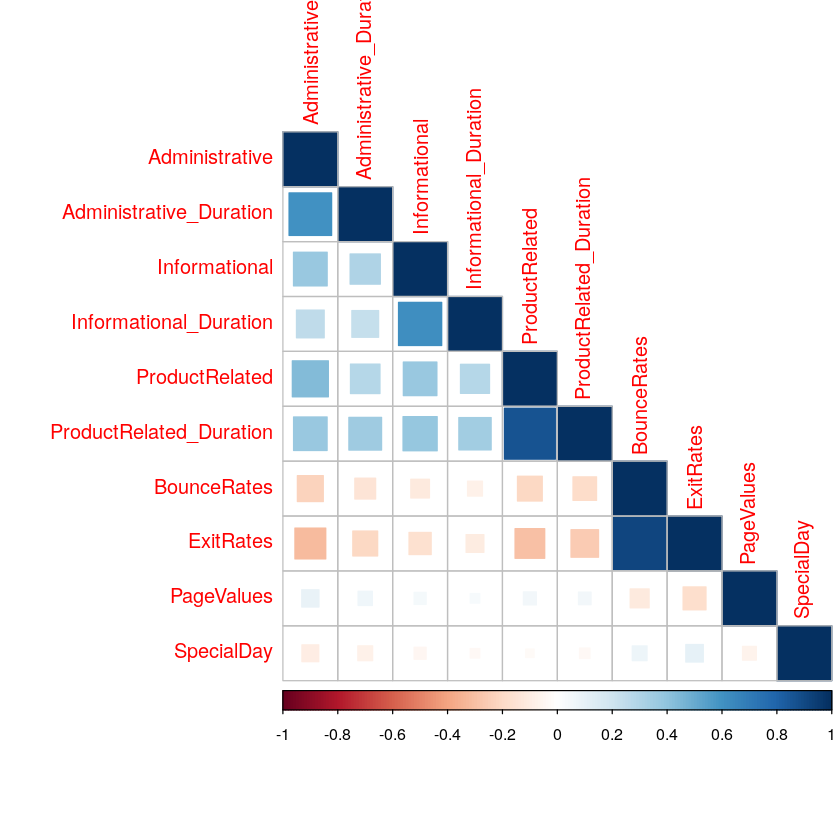

In [5]:
#correlation

library(corrplot)

correlation <- cor(data[,c(1:10)])
corrplot(correlation, method = "square", type = "lower", diag = TRUE)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



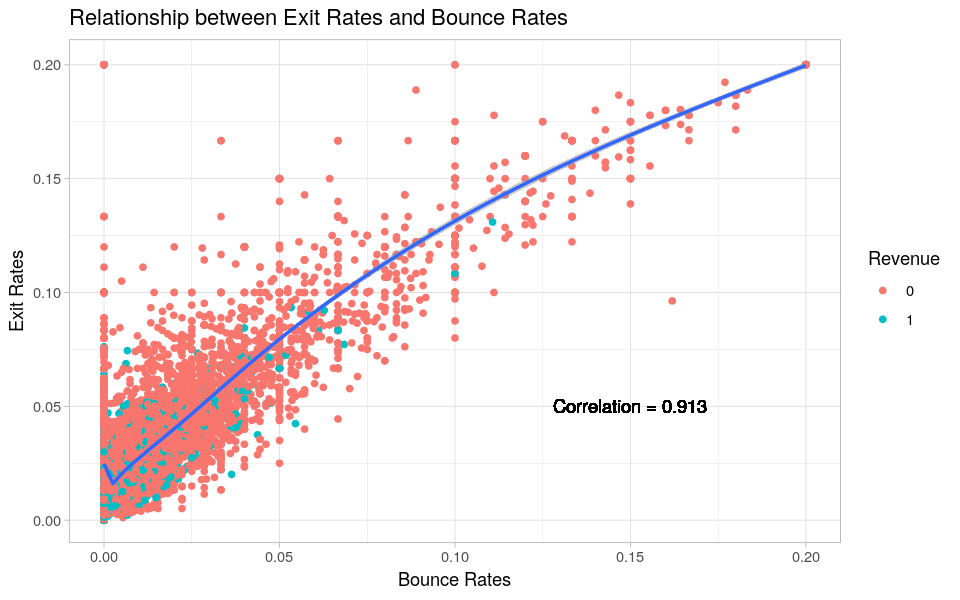

In [6]:
#Relationship between Exit Rates and Bounce Rates 

library(ggplot2)

options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(data = data, mapping = aes(x = BounceRates, y = ExitRates)) + geom_point(mapping = aes(color = Revenue)) + geom_smooth(se = TRUE, alpha = 0.5) + theme_light() + ggtitle("Relationship between Exit Rates and Bounce Rates") + xlab("Bounce Rates") + ylab("Exit Rates") + geom_text(mapping = aes(x = 0.15, y = 0.05, label = "Correlation = 0.913"))

   
    New_Visitor Other Returning_Visitor
  0        1272    69              9081
  1         422    16              1470

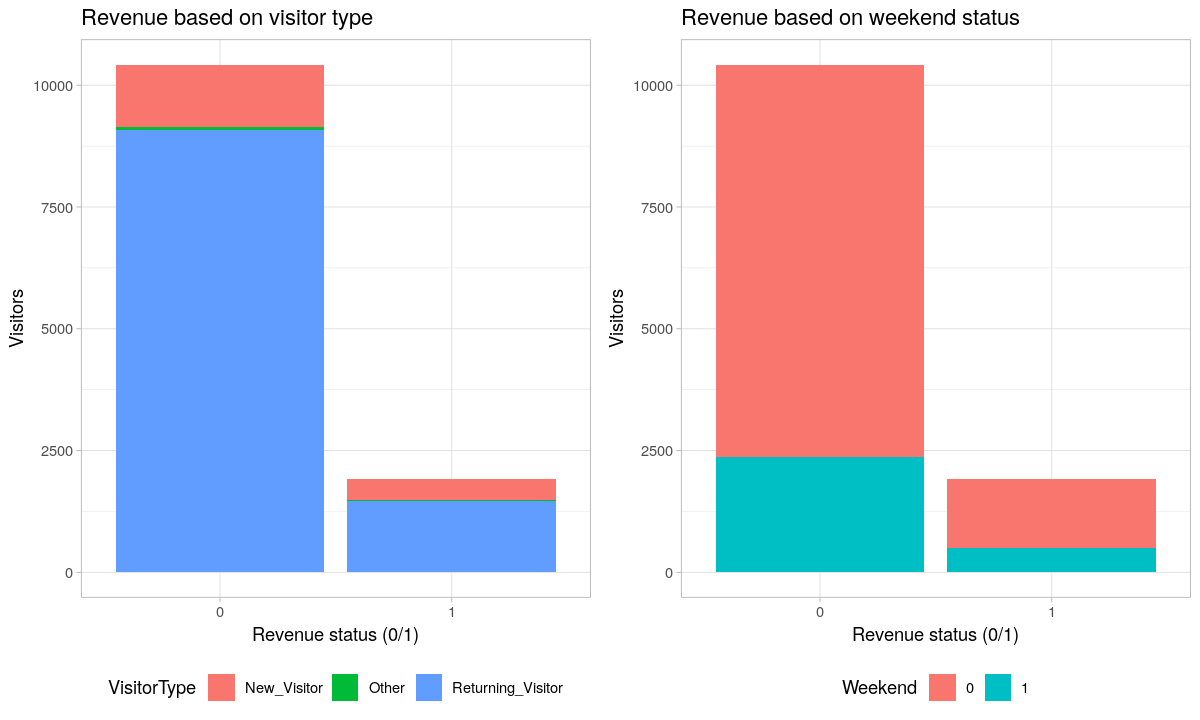

In [7]:
library(gridExtra)
table(data$Revenue, data$VisitorType)

options(repr.plot.width = 10, repr.plot.height = 6)
p1 <- ggplot(data = data, mapping = aes(x = Revenue)) + geom_bar(mapping = aes(fill = VisitorType)) + theme_light() + ggtitle("Revenue based on visitor type") + xlab("Revenue status (0/1)") + ylab("Visitors") + theme(legend.position = "bottom") 
options(repr.plot.width = 10, repr.plot.height = 6)
p2 <- ggplot(data = data, mapping = aes(x = Revenue)) + geom_bar(mapping = aes(fill = Weekend)) + theme_light() + ggtitle("Revenue based on weekend status") + xlab("Revenue status (0/1)") + ylab("Visitors") + theme(legend.position = "bottom")

grid.arrange(p1,p2, nrow = 1)

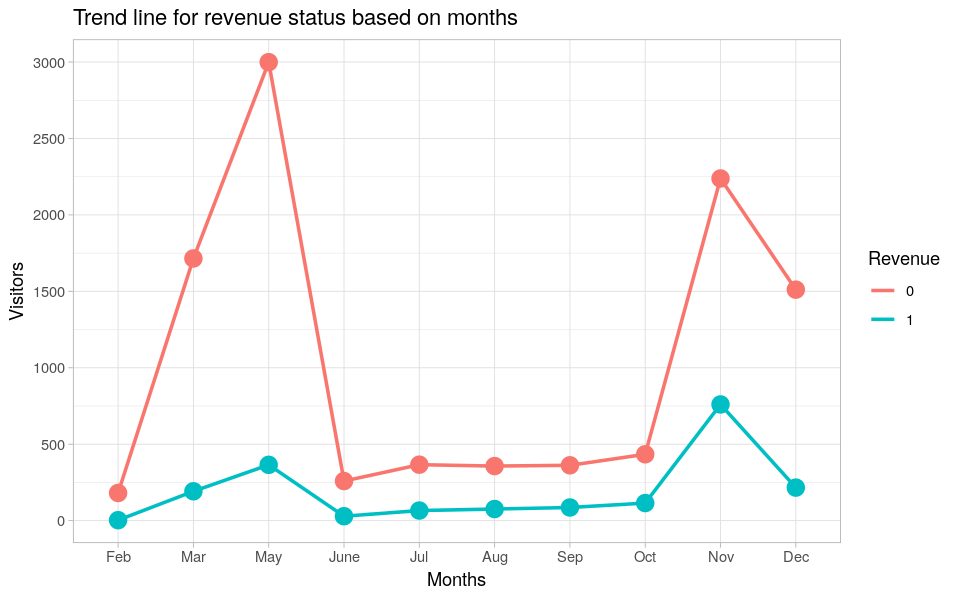

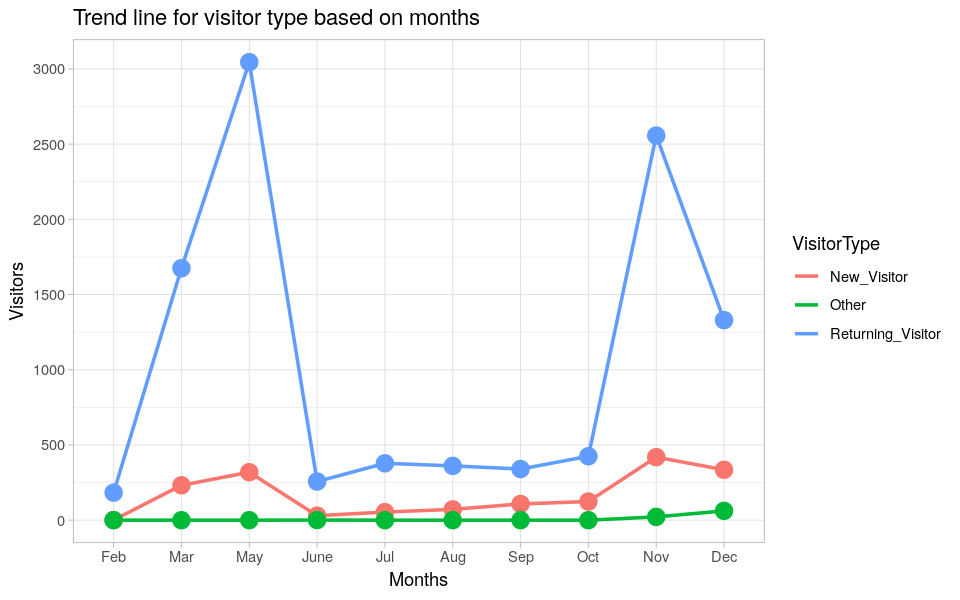

In [8]:
#Trend line for revenue status based on months and trend line for visitor type based on months 
options(repr.plot.width = 8, repr.plot.height = 5)

trend <- data.frame(table(data$Month, data$Revenue))
names(trend) <- c("Months", "Revenue", "Frequency")
ggplot(data = trend, mapping = aes(x = Months, y = Frequency)) + geom_line(mapping = aes(color = Revenue, group = Revenue), lwd = 1) + geom_point(mapping = aes(color = Revenue, group = Revenue, size = 0.1), show.legend = FALSE) + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 4000, by = 500)) + ggtitle("Trend line for revenue status based on months") + xlab("Months") + ylab("Visitors") 

trend <- data.frame(table(data$VisitorType, data$Month))
names(trend) <- c("VisitorType", "Month", "Frequency")
ggplot(data = trend, mapping = aes(x = Month, y = Frequency)) + geom_line(mapping = aes(color = VisitorType, group = VisitorType), lwd = 1) + geom_point(mapping = aes(color = VisitorType, group = VisitorType, size = 0.1), show.legend = FALSE) + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 4000, by = 500)) + ggtitle("Trend line for visitor type based on months") + xlab("Months") + ylab("Visitors")


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	16 obs. of  3 variables:
 $ Var1: Factor w/ 8 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 1 2 ...
 $ Var2: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 2 ...
 $ Freq: int  2206 5446 2287 393 5 17 6 62 379 1155 ...
'data.frame':	26 obs. of  3 variables:
 $ Var1: Factor w/ 13 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  2097 6738 100 606 381 154 43 114 1 131 ...


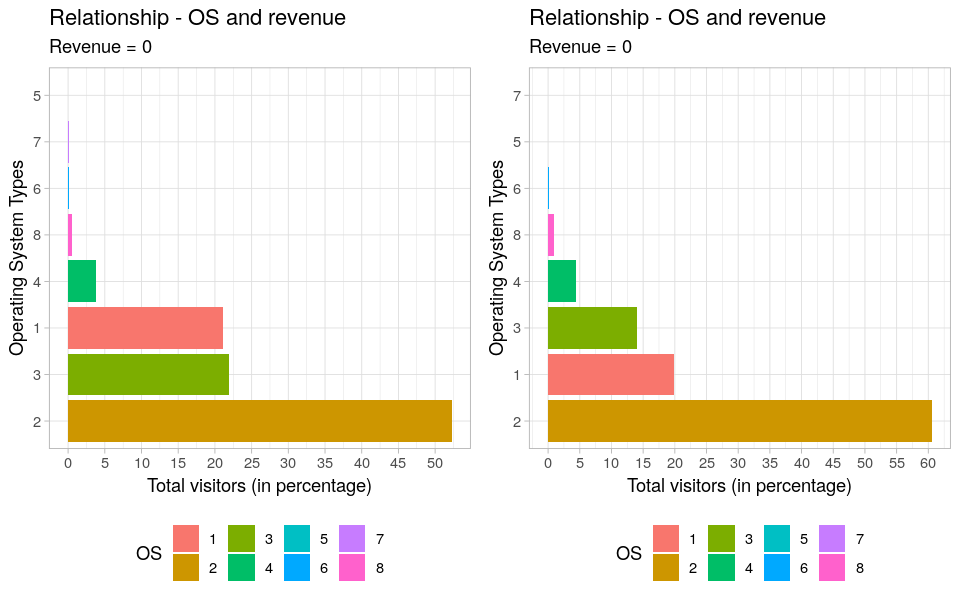

'data.frame':	18 obs. of  3 variables:
 $ Var1: Factor w/ 9 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 1 ...
 $ Var2: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 2 ...
 $ Freq: int  4009 948 2054 1007 266 693 642 378 425 771 ...


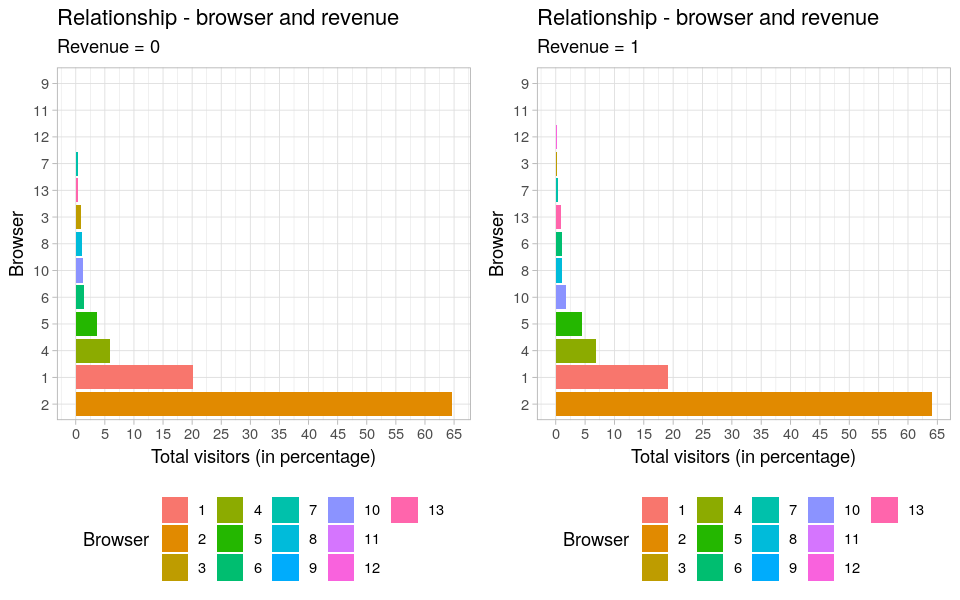

'data.frame':	40 obs. of  3 variables:
 $ Var1: Factor w/ 20 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Var2: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Freq: int  2189 3066 1872 904 204 391 28 248 38 360 ...


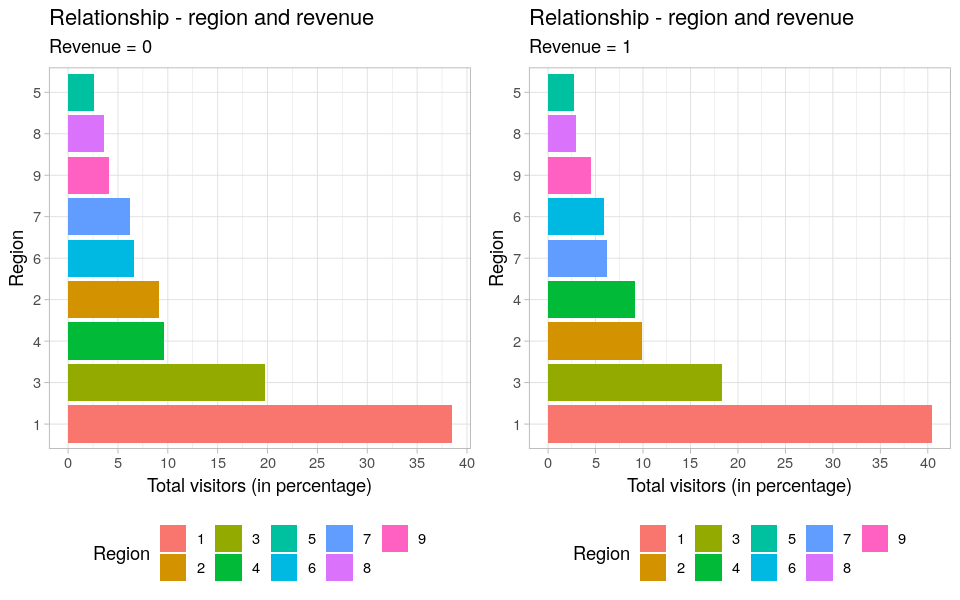

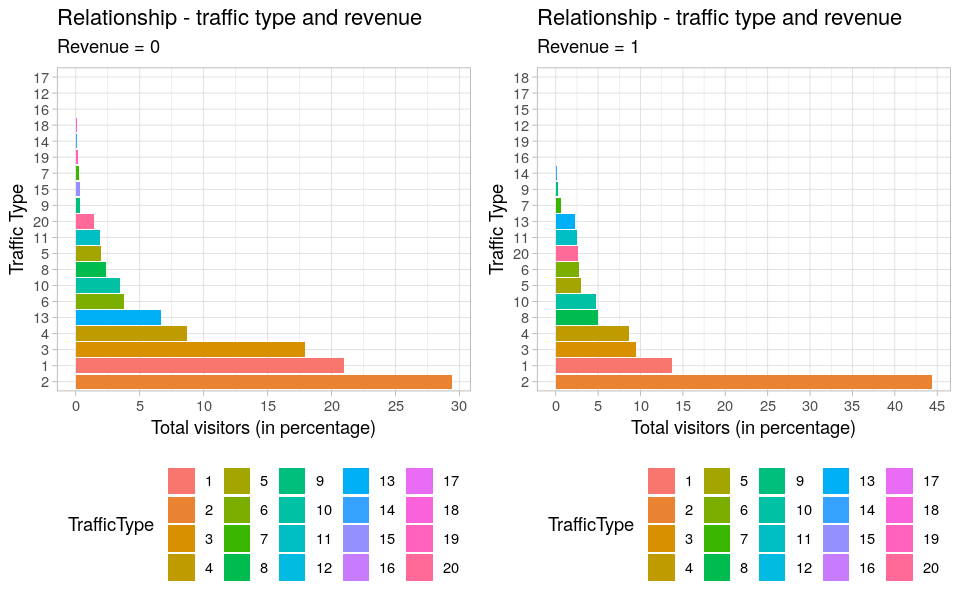

In [9]:
#Relationship between OS and Revenue 

library(dplyr)
trend <- data.frame(table(data$OperatingSystems, data$Revenue))
str(trend)
names(trend) <- c("OS", "Revenue", "Freq")
a <- trend %>% filter(Revenue == 0)
a$perc <- (a$Freq / sum(a$Freq)) * 100
b <- trend %>% filter(Revenue == 1)
b$perc <- (b$Freq / sum(b$Freq)) * 100
options(repr.plot.width = 8, repr.plot.height = 5)
plot1 <- ggplot(data = a, mapping = aes(x = reorder(OS, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = OS)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 60, by = 5)) + xlab("Operating System Types") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - OS and revenue") + labs(subtitle = "Revenue = 0")
plot2 <- ggplot(data = b, mapping = aes(x = reorder(OS, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = OS)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 60, by = 5)) + xlab("Operating System Types") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - OS and revenue") + labs(subtitle = "Revenue = 0")
grid.arrange(plot1, plot2, nrow = 1)

#Relationship between Browser and Revenue 

trend <- data.frame(table(data$Browser, data$Revenue))
str(trend)
names(trend) <- c("Browser", "Revenue", "Freq")
a <- trend %>% filter(Revenue == 0)
a$perc <- (a$Freq / sum(a$Freq)) * 100
b <- trend %>% filter(Revenue == 1)
b$perc <- (b$Freq / sum(b$Freq)) * 100
plot1 <- ggplot(data = a, mapping = aes(x = reorder(Browser, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = Browser)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 90, by = 5)) + xlab("Browser") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - browser and revenue") + labs(subtitle = "Revenue = 0")
plot2 <- ggplot(data = b, mapping = aes(x = reorder(Browser, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = Browser)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 90, by = 5)) + xlab("Browser") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - browser and revenue") + labs(subtitle = "Revenue = 1" )
grid.arrange(plot1, plot2, nrow = 1)

#Relationship between Region and Revenue 

trend <- data.frame(table(data$Region, data$Revenue))
str(trend)
names(trend) <- c("Region", "Revenue", "Freq")
a <- trend %>% filter(Revenue == 0)
a$perc <- (a$Freq / sum(a$Freq)) * 100
b <- trend %>% filter(Revenue == 1)
b$perc <- (b$Freq / sum(b$Freq)) * 100
plot1 <- ggplot(data = a, mapping = aes(x = reorder(Region, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = Region)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 60, by = 5)) + xlab("Region") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - region and revenue") + labs(subtitle = "Revenue = 0")
plot2 <- ggplot(data = b, mapping = aes(x = reorder(Region, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = Region)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 60, by = 5)) + xlab("Region") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - region and revenue") + labs(subtitle = "Revenue = 1" )
grid.arrange(plot1, plot2, nrow = 1)

#Relationship between traffic type and Revenue

trend <- data.frame(table(data$TrafficType, data$Revenue))
str(trend)
names(trend) <- c("TrafficType", "Revenue", "Freq")
a <- trend %>% filter(Revenue == 0)
a$perc <- (a$Freq / sum(a$Freq)) * 100
b <- trend %>% filter(Revenue == 1)
b$perc <- (b$Freq / sum(b$Freq)) * 100
plot1 <- ggplot(data = a, mapping = aes(x = reorder(TrafficType, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = TrafficType)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 60, by = 5)) + xlab("Traffic Type") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - traffic type and revenue") + labs(subtitle = "Revenue = 0")
plot2 <- ggplot(data = b, mapping = aes(x = reorder(TrafficType, -perc), y = perc)) + geom_bar(stat = "identity", mapping = aes(fill = TrafficType)) + coord_flip() + theme_light() + scale_y_continuous(breaks = seq(from = 0, to = 60, by = 5)) + xlab("Traffic Type") + ylab("Total visitors (in percentage)") + theme(legend.position = "bottom") + ggtitle("Relationship - traffic type and revenue") + labs(subtitle = "Revenue = 1" )
grid.arrange(plot1, plot2, nrow = 1)

In [10]:
#Data preprocessing for modelling 
library(plyr)
data <- read.csv("../input/online-shoppers-intention/online_shoppers_intention.csv")
data <- na.omit(data)

#numerical factors better for algorithms 
data$Month <- factor(data$Month, order = TRUE, levels =c('Feb', 'Mar', 'May', 'June','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'))
data$Month_num <- mapvalues(data$Month, from = c('Feb', 'Mar', 'May', 'June','Jul', 'Aug', 'Sep','Oct', 'Nov','Dec'), to = c(1,2,3,4,5,6,7,8,9,10))
data$VisitorType <- factor(data$VisitorType, order = TRUE, levels = c('Returning_Visitor', 'Other', 'New_Visitor'))
data$VisitorType_Num <-mapvalues(data$VisitorType, from = c("Returning_Visitor", "Other", "New_Visitor"), to = c(1,2,3))
data$OperatingSystems <- factor(data$OperatingSystems, order = TRUE, levels = c(6,3,7,1,5,2,4,8))
data$Browser <- factor(data$Browser, order = TRUE, levels = c(9,3,6,7,1,2,8,11,4,5,10,13,12))
data$Region <- factor(data$Region, order = TRUE, levels = c(8,6,3,4,7,1,5,2,9))
data$TrafficType <- factor(data$TrafficType, order = TRUE, levels = c(12,15,17,18,13,19,3,9,1,6,4,14,11,10,5,2,20,8,7,16))
data$Weekend <- ifelse(data$Weekend == TRUE, 1, 0)

str(data)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




'data.frame':	12330 obs. of  20 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Ord.factor w/ 10 levels "Feb"<"Mar"<"May"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ OperatingSystems       : Ord.factor w/ 8 levels "6"<"3"<"7"<"1"<..: 4 6 7 2 2 6 6 4 6 6 ...
 $ Browser                : Ord.factor w/ 13 levels "9"<"3"<"6"<"7"<..: 5 6 5 6 2 6 9 6 6 9 ...
 $ Region                 : Ord.factor w/ 9 levels "8"<"6"<"3"<"4"<..: 6 6 9 8 6 6 3 6 8 6

In [11]:
#Split the training and testing sets 
library(caret)

set.seed(777)
split  <- createDataPartition(data$Revenue, p = 0.8, list = FALSE)
train <- data[split,]
test <- data[-split,]

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [12]:
#Scale 
sample_train <- train
sample_train[,c(1:10)] <- scale(sample_train[,c(1:10)])

,model4_decision.variable.importance
,<dbl>
PageValues,1018.06683
BounceRates,103.43653
Administrative,60.56971
ProductRelated,52.19655
ExitRates,36.51023
VisitorType,28.91900
VisitorType_Num,28.91900
ProductRelated_Duration,26.33959
Administrative_Duration,19.14802


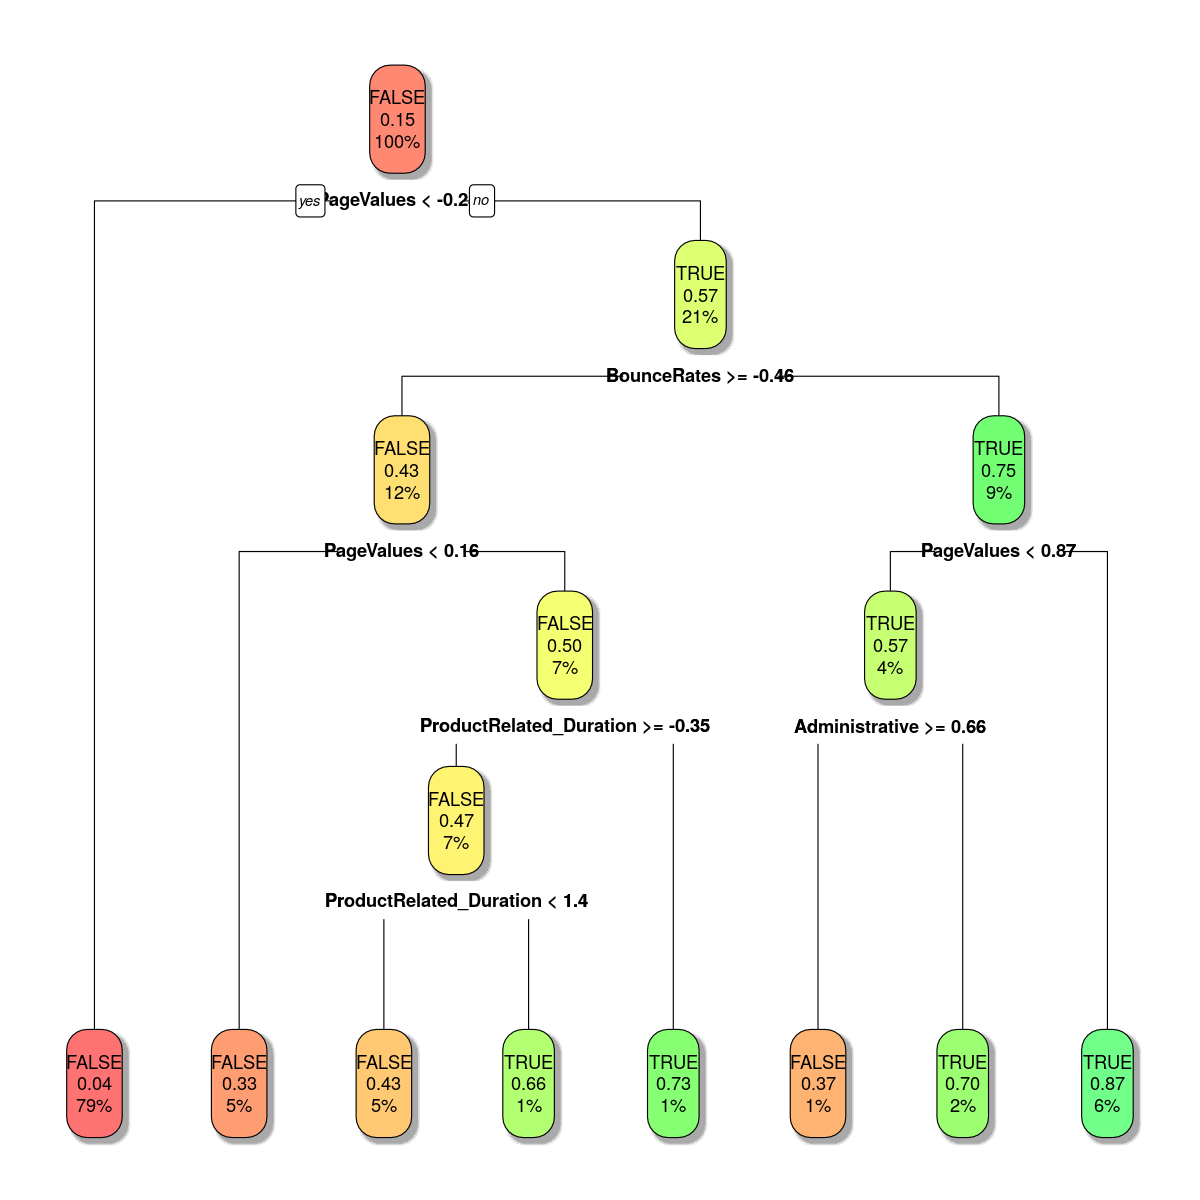

In [13]:
library(rpart)
library(rpart.plot)

set.seed(1)
model4_decision <- rpart(Revenue ~ ., data = sample_train, method = "class")
options(repr.plot.width = 10, repr.plot.height = 10)
rpart.plot(model4_decision, box.palette = "RdYlGn", shadow.col = "darkgray")
data.frame(model4_decision$variable.importance)

In [14]:
metrics <- function(x){
  Accuracy <- (x[4] + x[1]) / (nrow(train))
  ErrorRate <- (x[3] + x[2]) / (nrow(train))
  TPR_Recall <- x[4] / (x[2] + x[4])
  FPR <- x[3] / (x[3] + x[1])
  TNR_Specificity <- x[1] / (x[1] + x[3])
  Precision <- x[4] / (x[3] + x[4])
  F1score <- (2 * Precision * TPR_Recall) / (Precision + TPR_Recall)
  cat("Accuracy = ", Accuracy, "\n", "Error Rate = ", ErrorRate, "\n", "True Positive Rate (Recall) = ", TPR_Recall, "\n", "False Positive Rate = ", FPR, "\n", "True Negative Rate (Specificity) = ", TNR_Specificity, "\n", "Precision = ", Precision, "\n", "F1Score = ", F1score)
}

In [15]:
#prediction
cat("Model4: Decision Tree Classifier\n")
cat("Fitness level\n")
prediction <- predict(model4_decision, test, type = "class")
mean(prediction == test$Revenue)
cat("\nEvaluation on test set\n")
evaluate <- table(prediction, test$Revenue)
evaluate
metrics(evaluate)


Model4: Decision Tree Classifier
Fitness level


[1] 0.8730223


Evaluation on test set


          
prediction FALSE TRUE
     FALSE  1838   67
     TRUE    246  314

Accuracy =  0.218145 
 Error Rate =  0.03172833 
 True Positive Rate (Recall) =  0.5607143 
 False Positive Rate =  0.0351706 
 True Negative Rate (Specificity) =  0.9648294 
 Precision =  0.824147 
 F1Score =  0.6673751